               Pays  Valeur continents
0       Afghanistan     8.1       Asie
1       Afghanistan     8.1       Asie
2       Afghanistan     8.1       Asie
3       Afghanistan     8.1       Asie
4    Afrique du Sud     2.6    Afrique
..              ...     ...        ...
317          Zambie     7.0    Afrique
318        Zimbabwe     6.7    Afrique
319        Zimbabwe     6.7    Afrique
320        Zimbabwe     6.7    Afrique
321        Zimbabwe     6.7    Afrique

[322 rows x 3 columns]
        Pays  Valeur continents
130     Inde   213.1       Asie
131     Inde   213.1       Asie
132     Inde   213.1       Asie
59     Chine   137.3       Asie
57     Chine   137.3       Asie
..       ...     ...        ...
106   Gambie     0.2    Afrique
107   Gambie     0.2    Afrique
25   Arménie     0.1       Asie
26   Arménie     0.1       Asie
24   Arménie     0.1       Asie

[322 rows x 3 columns]


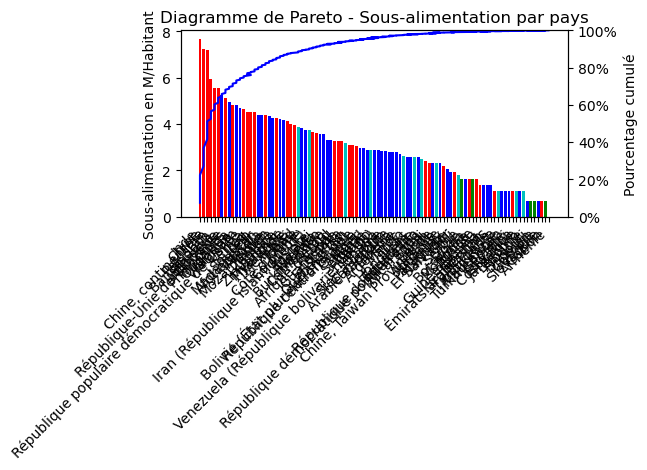

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# Chargement et préparation des données
names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
         'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
         'Valeur', 'Symbole', 'Description du Symbole']


fn_continent = 'fao_2013/FAOSTAT_2013_Continent.csv'
fn_s_a='fao_2013/FAOSTAT_2013_sous_alimentation.csv'



# création des dataframes
df_cont = pd.read_csv(fn_continent, header=0)
df_s_a = pd.read_csv(fn_s_a, names=names, header=0)

#suppression des valeur null
df_s_a.dropna(axis=0, subset=["Valeur"], inplace=True)

#création d'un nouveaux df avec deux colonne
df = df_s_a[['Pays','Valeur']]
#print(df)

df_cont = df_cont[['Groupe de pays','Pays' ]]
#print(df_cont)

#Récuperer l'index 0 de la colonne 0 et extraire le premier mot de la colonne Groupe de pays et la renommer continents
df_cont['continents'] = df_cont['Groupe de pays'].apply(lambda x: x.split()[0] )

#extraction de toutes les valeurs differentes des continents attendus
df_cont = df_cont[df_cont['continents'].isin(['Afrique', 'Europe', 'Océanie', 'Asie', 'Amérique'])]

#dataframe avec les deux colonnes pays et continents
df_cont = df_cont[['Pays', 'continents']]
#print(df_cont)

#merge des deux dataframes df et df_cont sur le colonne pays 
df3 = pd.merge(df, df_cont, on=['Pays'])

print(df3)


# Trier le DataFrame par la colonne 'Valeur' en ordre décroissant
df3 = df3.sort_values(by='Valeur', ascending=False)
print(df3)

# Calculer la somme cumulée de la colonne 'Valeur'
df3['Valeur_cum'] = df3['Valeur'].cumsum()

# Calculer le pourcentage cumulé de la colonne 'Valeur'
df3['Valeur_pct'] = df3['Valeur_cum'] / df3['Valeur'].sum()*100

#Couleur en fonction du continent correspondant

#liste des couleurs pour la distinction sur le graphe 
colors = ['b', 'g', 'r', 'c', 'm']

# for avec iterrows 
for index, row in df3.iterrows():
  # Si la valeur de la colonne 'continents' est 'Afrique'
    if row['continents'] == 'Afrique':
    # Ajout de la couleur bleu
        colors.append('b')
    elif row['continents'] == 'Europe':
        colors.append('g')
    elif row['continents'] == 'Asie':
        colors.append('r')
    elif row['continents'] == 'Amérique': 
        colors.append('c')
    elif row['continents'] == 'Océanie':
        colors.append




# Création du graphique à barres
fig, ax1 = plt.subplots()
ax1.bar(df3['Pays'], np.log(df3['Valeur']*10),color=colors)

# Création d'un deuxième axe des y
ax2 = ax1.twinx()

# Réglage de l'axe des y allant de 0 à 100%
ax2.set_ylim(0, 100)

# Création d'un formateur de pourcentage
formatter = PercentFormatter(xmax=100)

# Réglage de l'axe des y avec le formateur de pourcentage
ax2.yaxis.set_major_formatter(formatter)

# Tracé du deuxième axe des y
ax2.plot(df3['Pays'], df3['Valeur_pct'], color='blue')

# Mise des étiquettes de pourcentage à droite de l'axe des y
ax2.tick_params(axis='y', which='both', labelright=True)

# Ajout d'un titre au graphique
plt.title("Diagramme de Pareto - Sous-alimentation par pays")

# Ajout d'une étiquette pour l'axe des x
plt.xlabel("Pays")

# Faire tourner les étiquettes des valeurs sur l'axe des x
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")


# Ajout d'une étiquette pour l'axe des y de gauche (valeurs en pourcentage)
ax1.set_ylabel("Sous-alimentation en M/Habitant")

# Ajout d'une étiquette pour l'axe des y de droite (pourcentage cumulé)
ax2.set_ylabel("Pourcentage cumulé")


# Ajuster les marges du graphique
plt.tight_layout()

# Affichage du graphique
plt.show()


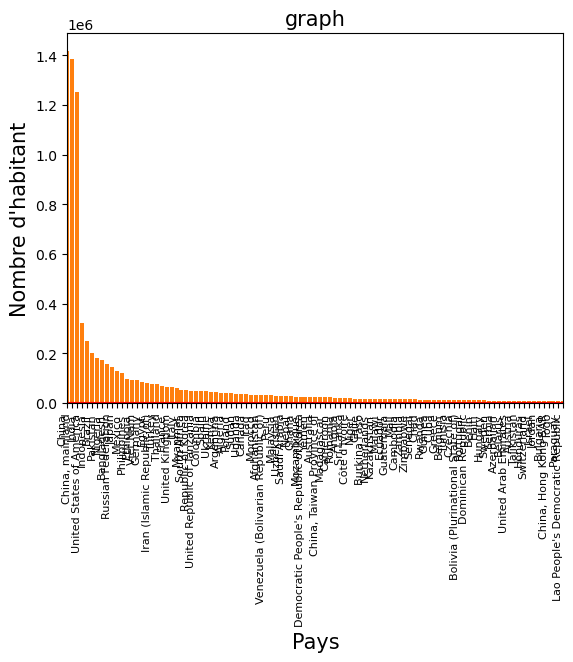

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
         'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
         'Valeur', 'Symbole', 'Description du Symbole']



fn_pop='fao_2013/FAOSTAT_2013_population.csv'

df_s_a = pd.read_csv(fn_pop, names=names, header=0)
df_s_a.dropna(subset=['Valeur'])
df = df_s_a[['Pays','Valeur']]
df



# Trier le DataFrame par la colonne 'Valeur en ordre décroissant
df = df.sort_values(by='Valeur', ascending=False)

# Calculer la somme cumulée de la colonne 'Valeur'
df['Valeur_cum'] = df['Valeur'].cumsum()

# Calculer le pourcentage cumulé de la colonne 'Valeur'
df['Valeur_pct'] = df['Valeur_cum'] / df['Valeur'].sum()

x = df['Pays']
y = df['Valeur']

fig, ax = plt.subplots()
ax.bar(x, y)

# Faire tourner les étiquettes des valeurs sur l'axe des x
plt.xticks(rotation=90, ha="right", fontsize=8)


plt.title("graph",fontsize=15)

plt.xlabel("Pays", fontsize=15)

plt.ylabel("Nombre d'habitant",fontsize=15)
# Créer le diagramme de Pareto


ax.bar(df['Pays'], df['Valeur'])
ax.plot(df['Pays'], df['Valeur_pct'], color='red')
ax.set_xlim(0, 100)
# Afficher le diagramme
plt.show()
